In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics as st
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv("finalTrain.csv")

## DATA CLEANING AND EDA

In [3]:
data.shape

(45584, 20)

In [4]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [5]:
data.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26
45583,0x5fb2,RANCHIRES09DEL02,23.0,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10,17:15,Fog,Medium,2,Snack,scooter,1.0,No,Metropolitian,36


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [7]:
# drop unwanted colums
data.drop(["ID","Delivery_person_ID","Order_Date","Time_Orderd","Time_Order_picked"],axis=1,inplace=True)

In [8]:
# CheckNull VAlues
data.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [9]:
# Handaled Null values
data["Delivery_person_Age"] = data["Delivery_person_Age"].fillna(np.nanmedian(data["Delivery_person_Age"]))
data["Delivery_person_Ratings"] = data["Delivery_person_Ratings"].fillna(np.nanmedian(data["Delivery_person_Ratings"]))
data["multiple_deliveries"] = data["multiple_deliveries"].fillna(np.nanmedian(data["multiple_deliveries"]))

In [10]:
# for catigorical data use mode to replace fill na
data["Weather_conditions"] = data["Weather_conditions"].fillna(st.mode(data["Weather_conditions"]))
data["Road_traffic_density"] = data["Road_traffic_density"].fillna(st.mode(data["Road_traffic_density"]))
data["Festival"] = data["Festival"].fillna(st.mode(data["Festival"]))
data["City"] = data["City"].fillna(st.mode(data["City"]))

In [11]:
# Check with deplicet values
data.duplicated().sum()

1

In [12]:
# there is only 1 duplicet value drop it
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(45583, 15)

In [14]:
# saprate catio nand num features
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')
Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')


In [15]:
# check unique values of all catigorical features
for i in catigorical_features:
    print(i,data[i].unique())
    print("="*80)

Weather_conditions ['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny']
Road_traffic_density ['Jam' 'High' 'Medium' 'Low']
Type_of_order ['Snack' 'Meal' 'Drinks' 'Buffet']
Type_of_vehicle ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']
Festival ['No' 'Yes']
City ['Metropolitian' 'Urban' 'Semi-Urban']


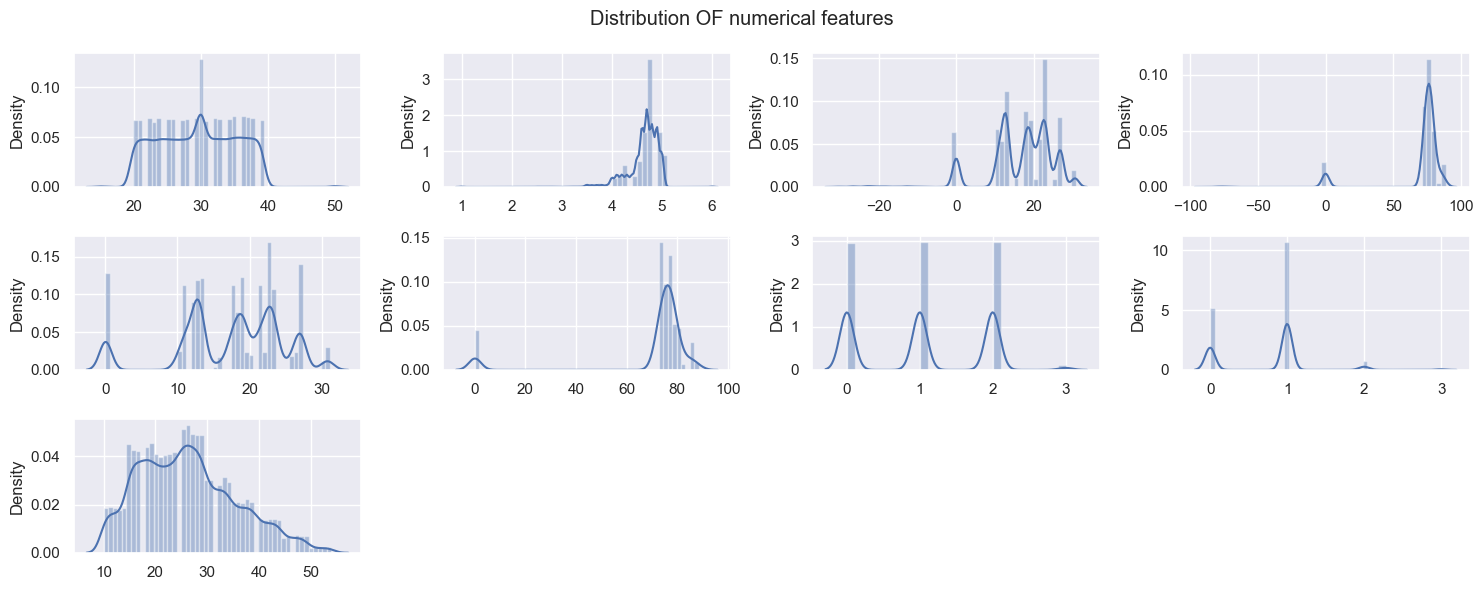

In [16]:
try:
    plt.suptitle("Distribution OF numerical features")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)
        
    

In [17]:
cato = ['Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']

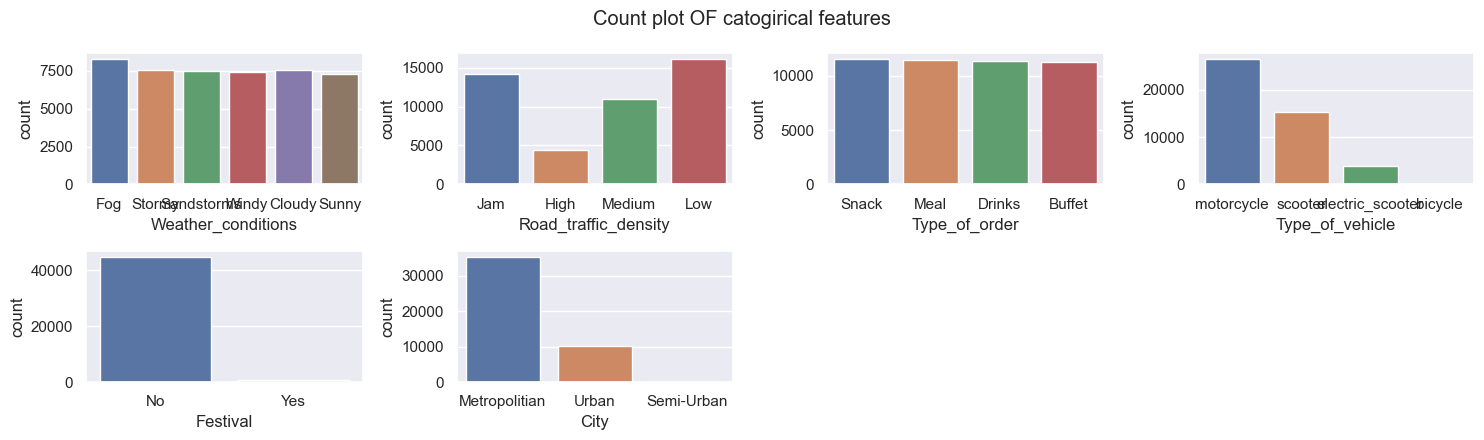

In [18]:
try:
    plt.suptitle("Count plot OF catogirical features")
    for i in range(0,len(cato)):
        plt.subplot(3,4,i+1)
        sns.countplot(x=data[cato[i]])
        plt.tight_layout()
except Exception as e:
    print(e)
        

In [19]:
weather = data.groupby("Weather_conditions")["Time_taken (min)"].sum().sort_values(ascending=False).reset_index()

observation si when weather is foggy time is taken more then sunny


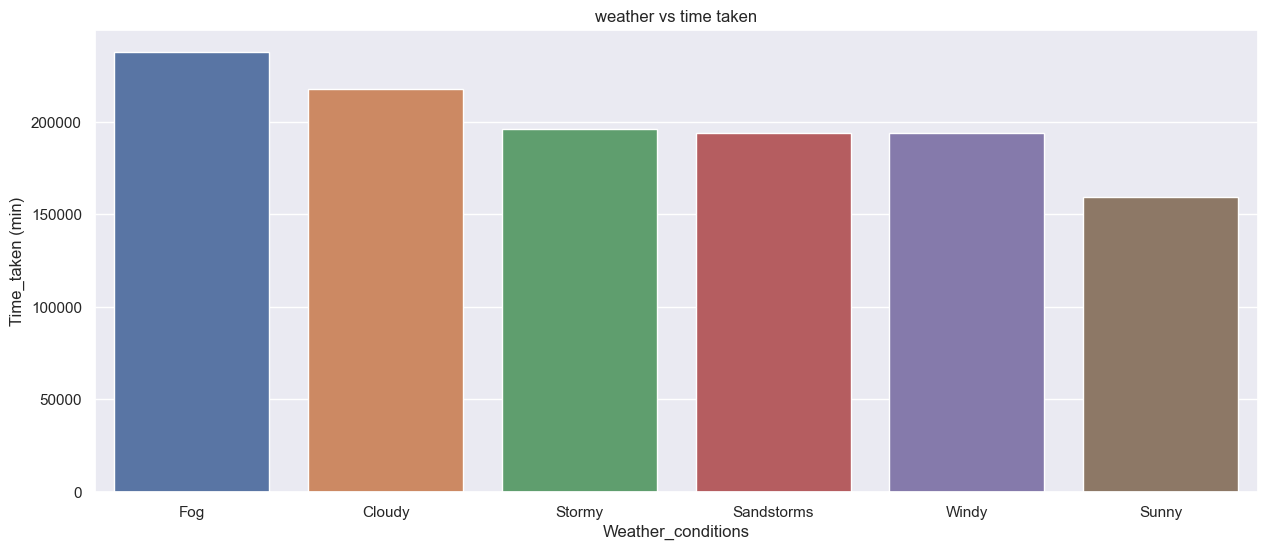

In [20]:
plt.title("weather vs time taken")
sns.barplot(x="Weather_conditions",y="Time_taken (min)",data=weather)
print("observation si when weather is foggy time is taken more then sunny")

In [21]:
traffic = data.groupby("Road_traffic_density")["Time_taken (min)"].mean().sort_values(ascending=False).reset_index()

observation is when ever traffic is jam taken time is more and when ever the traffic is low time taken is less


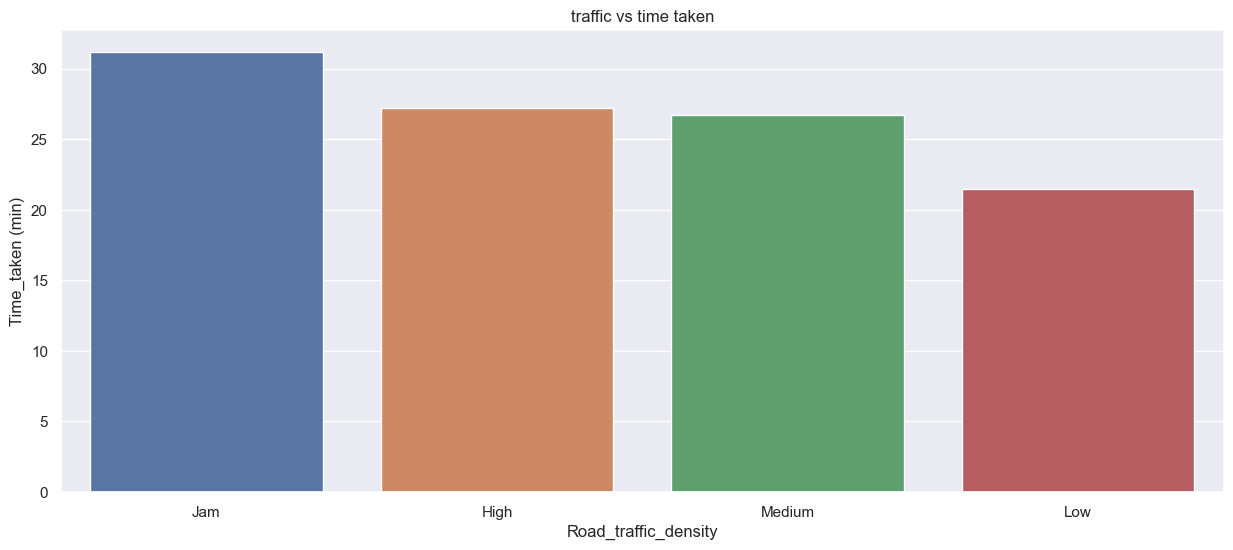

In [22]:
plt.title("traffic vs time taken")
sns.barplot(x="Road_traffic_density",y="Time_taken (min)",data=traffic)
print("observation is when ever traffic is jam taken time is more and when ever the traffic is low time taken is less")

In [23]:
order = data.groupby("Type_of_order")["Time_taken (min)"].mean().sort_values(ascending=False).reset_index()

In [24]:
order

,Type_of_order,Time_taken (min)
0,Meal,26.417598
1,Snack,26.285603
2,Buffet,26.283320
3,Drinks,26.188163


observation is all ordet make on time


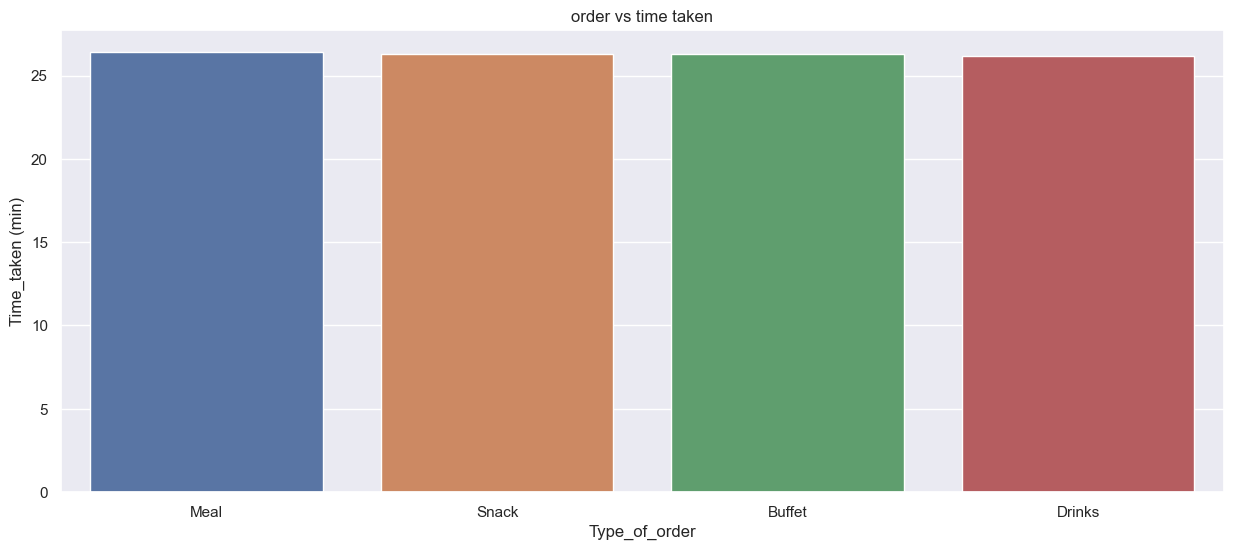

In [25]:
plt.title("order vs time taken")
sns.barplot(x="Type_of_order",y="Time_taken (min)",data=order)
print("observation is all ordet make on time")

In [26]:
vehical = data.groupby("Type_of_vehicle")["Time_taken (min)"].sum().sort_values(ascending=False).reset_index()

observation is when ever delivery gy use motercycle the timr fo delivery is less


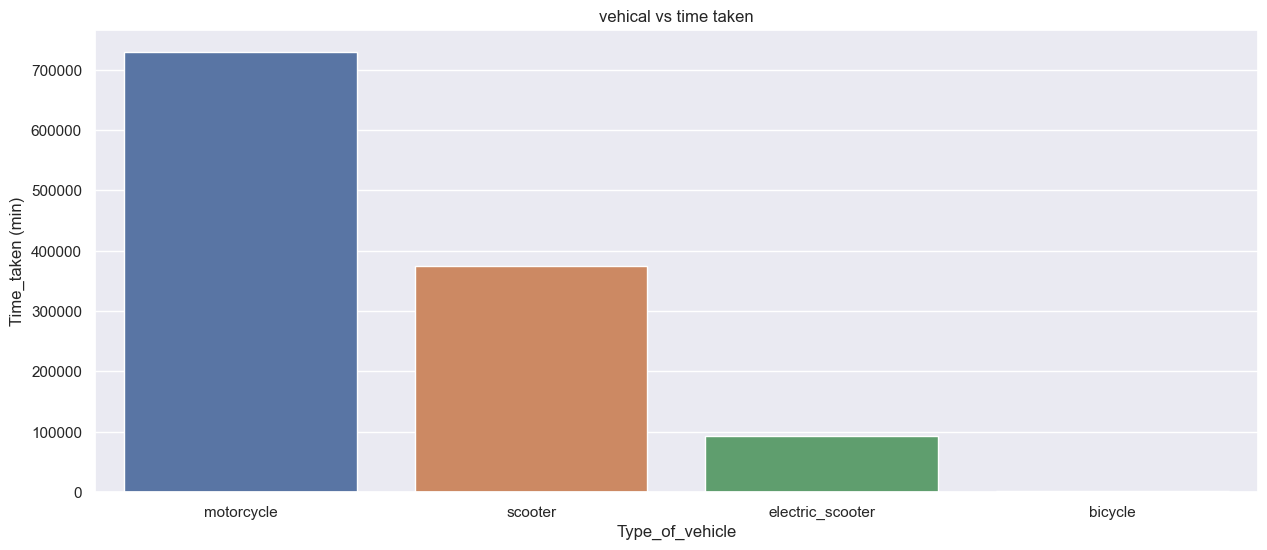

In [27]:
plt.title("vehical vs time taken")
sns.barplot(x="Type_of_vehicle",y="Time_taken (min)",data=vehical)
print("observation is when ever delivery gy use motercycle the timr fo delivery is less")

<AxesSubplot:ylabel='Time_taken (min)'>

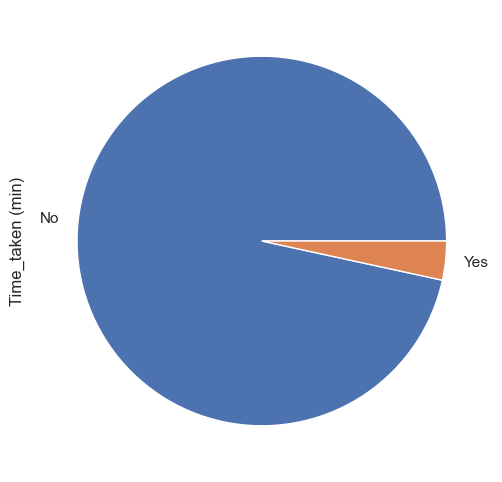

In [28]:
data.groupby("Festival")["Time_taken (min)"].sum().sort_values(ascending=False).plot.pie()

In [29]:
city = data.groupby("City")["Time_taken (min)"].sum().sort_values(ascending=False).reset_index()

observation is when ever delivery take place in semi urba it take time mor thrn metropol


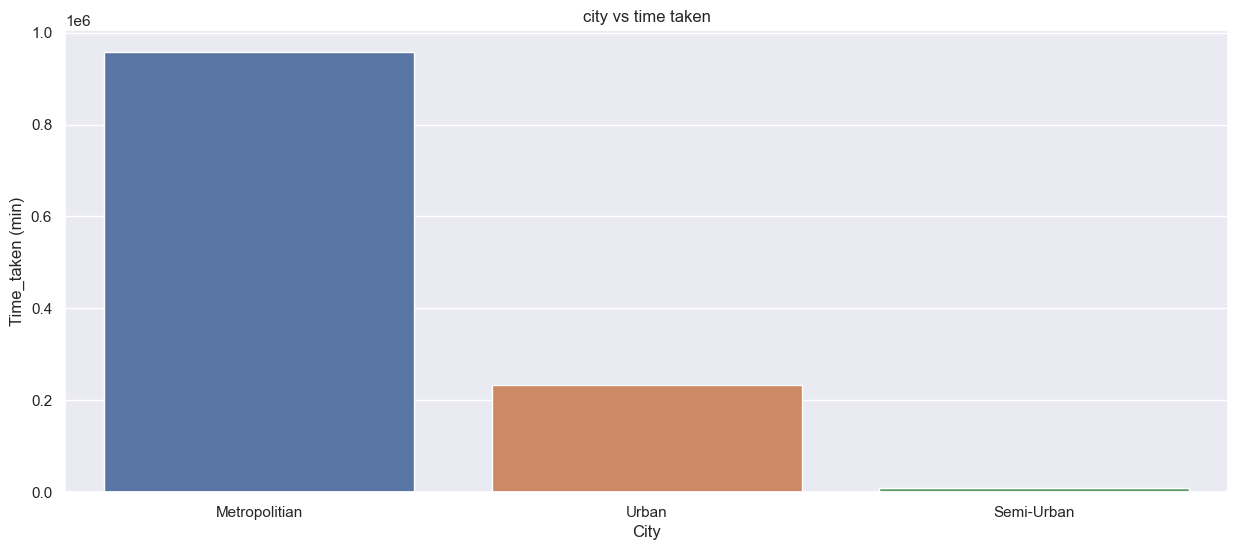

In [30]:
plt.title("city vs time taken")
sns.barplot(x="City",y="Time_taken (min)",data=city)
print("observation is when ever delivery take place in semi urba it take time mor thrn metropol")

In [31]:
# use label encoding on catigorical data to convert in to numerical
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in catigorical_features:
     data[i] = lable.fit_transform(data[i])

In [32]:
data.to_csv("clean_delivery_time.csv",index=False)

<AxesSubplot:>

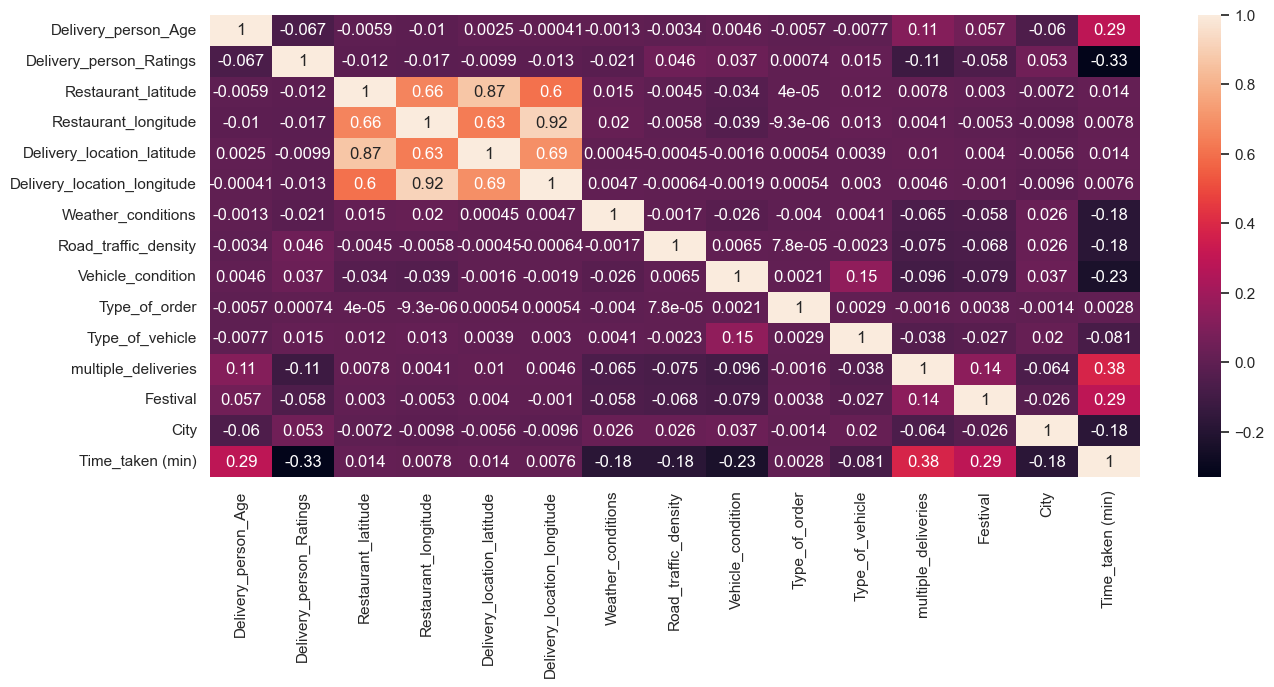

In [33]:
sns.heatmap(data.corr(),annot=True)

## MODEL Traning

In [34]:
data

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,1,1,2,3,2,3.0,0,0,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,3,0,1,2,2,1.0,0,0,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2,3,1,1,3,1.0,0,0,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2,2,0,0,2,0.0,0,0,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1,1,1,3,3,1.0,0,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,5,0,1,2,2,0.0,0,0,32
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,5,1,0,0,2,1.0,0,0,36
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,0,2,1,1,3,0.0,0,0,16
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,0,0,0,3,2,1.0,0,0,26


In [35]:
# saprate indipend and deprndent variable
x = data.drop("Time_taken (min)",axis=1)
y = data["Time_taken (min)"]

In [36]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City'],
      dtype='object')


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [38]:
## Num_pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [39]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36466, 14)
(9117, 14)
(36466,)
(9117,)


In [41]:
# transformaing data using preprocessor obj
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [97]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestRegressor

In [103]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test,predict)
    r2score = r2_score(test,predict)
    r2score = r2_score(y_test, y_pradict)
    return mse,rmse,mae,r2score

In [104]:
# Multipal Model Traning
models =  {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "ElasticNet":ElasticNet(),
    "RandomForestRegressor":RandomForestRegressor(random_state=3)
}

model_list = []
r2_list = []
y_pred_list = []

for i in range(len(list(models))):
    model  = list(models.values())[i]
#     train Model
    model.fit(X_train,y_train)
    # Make Prediction
    y_pradict = model.predict(X_test)
    
    mse,mae,rmse,r2score = model_evalution(y_test,y_pradict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    # matrix performance
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2score*100)
    print("="*40)
    
    r2_list.append(r2score*100)
    y_pred_list.append(y_pradict)

LinearRegression
Model Traning Performance
MSE 5106.302516692254
MAE 714.5839710413503
RMSE 576.2394380381829
R2 42.0719452344813
Ridge
Model Traning Performance
MSE 5106.30484930994
MAE 714.5841342564177
RMSE 576.2397637853973
R2 42.07191877228
Lasso
Model Traning Performance
MSE 5738.315625843129
MAE 757.5167077921865
RMSE 613.2482115277508
R2 34.902121300286815
ElasticNet
Model Traning Performance
MSE 5764.954832735374
MAE 759.2729965391483
RMSE 617.3553777447104
R2 34.599914873871725
RandomForestRegressor
Model Traning Performance
MSE 2282.378453833498
MAE 477.74244670465464
RMSE 370.8863880662499
R2 74.10773379816287


In [105]:
# get the index of the best model
best_model_index = r2_list.index(max(r2_list))

# fetch the best model name and R2 score
best_model_name = model_list[best_model_index]
best_model_r2 = r2_list[best_model_index]

# print the best model name and R2 score
print(f"Best Model: {best_model_name}")
print(f"R2 Score: {best_model_r2}")

Best Model: RandomForestRegressor
R2 Score: 74.10773379816287


In [106]:
model.score(X_train,y_train)

0.9639586865132365

Text(0, 0.5, 'Predictions')

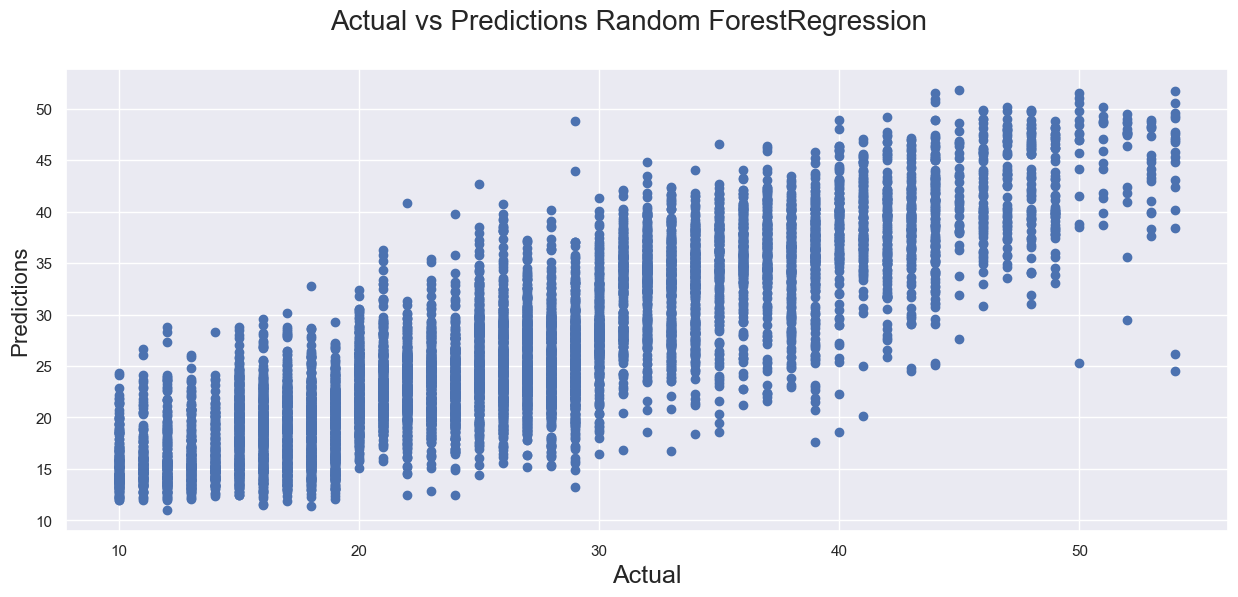

In [107]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_list[4])
fig.suptitle('Actual vs Predictions Random ForestRegression', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16) 

In [109]:
data.iloc[:,:-1]

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,1,1,2,3,2,3.0,0,0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,3,0,1,2,2,1.0,0,0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2,3,1,1,3,1.0,0,0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2,2,0,0,2,0.0,0,0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1,1,1,3,3,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,5,0,1,2,2,0.0,0,0
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,5,1,0,0,2,1.0,0,0
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,0,2,1,1,3,0.0,0,0
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,0,0,0,3,2,1.0,0,0


In [116]:
data.iloc[:,-1]

0        46
1        23
2        21
3        20
4        41
         ..
45579    32
45580    36
45581    16
45582    26
45583    36
Name: Time_taken (min), Length: 45583, dtype: int64